In [ ]:
pip install xgboost scikit-learn


In [1]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import time
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
df = pd.read_csv("meds_train_alunos.csv")

In [ ]:
#Selecionar colunas numéricas para treinamento do XGBoost
feature_columns = [col for col in df.columns if col.startswith('rssi') or col.startswith('delay')]
scaler = MinMaxScaler()
data = scaler.fit_transform(df[feature_columns].dropna())

In [ ]:
df.columns

Index(['ponto_id', 'rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2',
       'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3', 'delay_1', 'delay_2',
       'delay_3', 'lat', 'lon', 'indoor'],
      dtype='object')

In [ ]:
df

,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon,indoor
0,6604,-103.705000,-110.425000,-107.381667,-110.330000,-108.345000,-106.590000,-107.153333,-102.120000,-115.0000,5.0,3.0,2.0,-8.055786,-34.951505,True
1,5515,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-88.470000,-94.024286,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
2,5049,-102.610000,-115.000000,-101.380000,-115.000000,-104.295000,-97.360000,-96.980000,-99.572500,-115.0000,5.0,3.0,2.0,-8.055506,-34.951693,True
3,8737,-89.140000,-97.251429,-86.642857,-96.036667,-96.592500,-92.460000,-86.813333,-102.688000,-87.2700,4.0,7.0,2.0,-8.050390,-34.959630,False
4,1203,-109.088333,-107.200000,-107.010000,-108.430000,-104.845714,-101.435714,-103.065000,-102.110000,-115.0000,5.0,3.0,2.0,-8.055380,-34.951736,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,5734,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-93.005000,-97.114286,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
6771,5191,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-87.315000,-88.735714,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
6772,5390,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-95.165000,-90.705714,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
6773,860,-109.088333,-107.200000,-107.010000,-108.430000,-97.200000,-98.148571,-99.840000,-94.665000,-115.0000,5.0,3.0,2.0,-8.055380,-34.951736,True


In [ ]:
# Remover colunas desnecessárias
df.drop(columns=['ponto_id'], inplace=True)

# Separar as features e os alvos
X = df.drop(columns=['lat', 'lon'])
y = df[['lat', 'lon']]

In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
# Modelos para latitude e longitude
xgb_lat = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_lon = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)


In [ ]:
# Medir o tempo de treinamento
start_time = time.time()

# Treinar modelos
xgb_lat.fit(X_train, y_train['lat'])
xgb_lon.fit(X_train, y_train['lon'])

# Tempo de execução
end_time = time.time()
execution_time = end_time - start_time

In [ ]:
# Fazer previsões
y_pred_lat = xgb_lat.predict(X_test)
y_pred_lon = xgb_lon.predict(X_test)

# Calcular erro médio absoluto
mae_lat = mean_absolute_error(y_test['lat'], y_pred_lat)
mae_lon = mean_absolute_error(y_test['lon'], y_pred_lon)

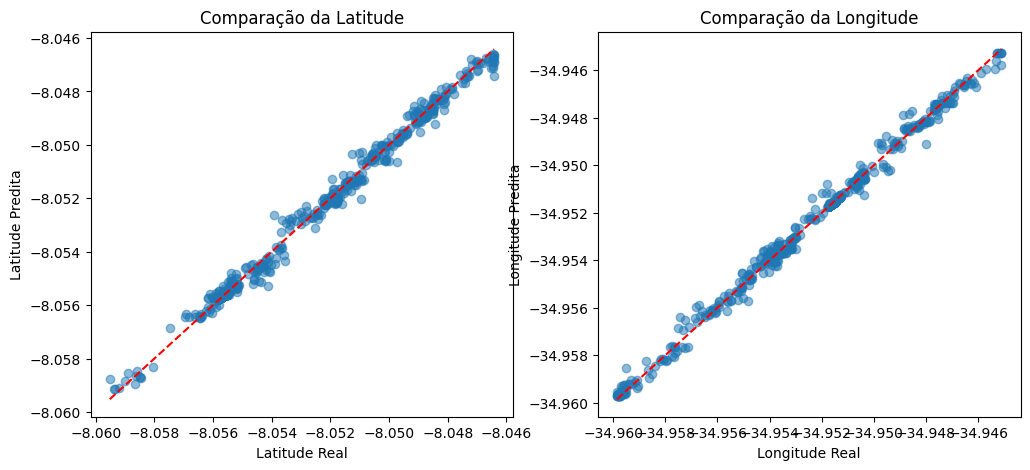

In [ ]:
# Plot Latitude
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test['lat'], y_pred_lat, alpha=0.5)
plt.plot([min(y_test['lat']), max(y_test['lat'])], [min(y_test['lat']), max(y_test['lat'])], 'r--')
plt.xlabel("Latitude Real")
plt.ylabel("Latitude Predita")
plt.title("Comparação da Latitude")

# Plot Longitude
plt.subplot(1, 2, 2)
plt.scatter(y_test['lon'], y_pred_lon, alpha=0.5)
plt.plot([min(y_test['lon']), max(y_test['lon'])], [min(y_test['lon']), max(y_test['lon'])], 'r--')
plt.xlabel("Longitude Real")
plt.ylabel("Longitude Predita")
plt.title("Comparação da Longitude")

plt.show()

In [ ]:
import folium

# Criar um mapa centralizado na média das localizações reais
mapa = folium.Map(location=[y_test['lat'].mean(), y_test['lon'].mean()], zoom_start=15)

# Adicionar pontos reais
for lat, lon in zip(y_test['lat'], y_test['lon']):
    folium.CircleMarker(location=[lat, lon], radius=3, color="blue", fill=True).add_to(mapa)

# Adicionar pontos preditos
for lat, lon in zip(y_pred_lat, y_pred_lon):
    folium.CircleMarker(location=[lat, lon], radius=3, color="red", fill=True).add_to(mapa)

# Exibir o mapa
mapa


<ipython-input-56-c70807425d8d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importância", y="Feature", data=importancia_df, palette="viridis")


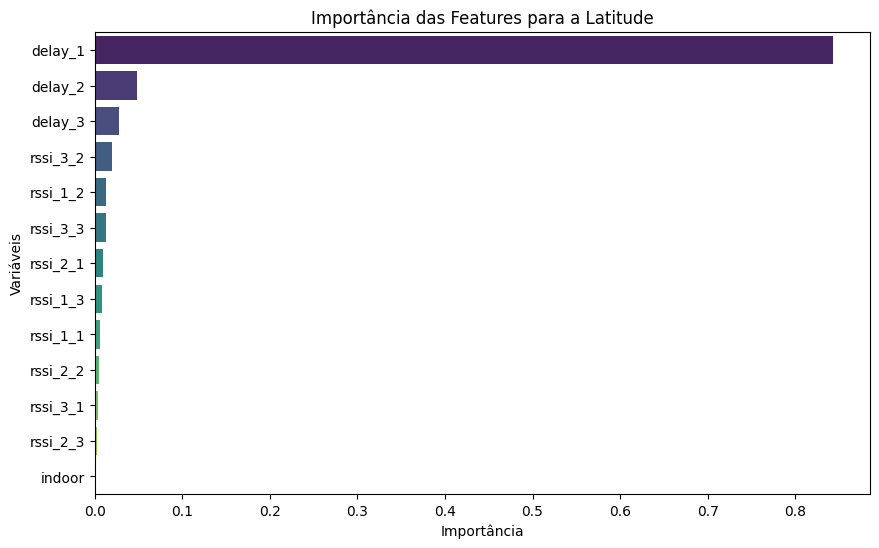

In [ ]:
# Obter importância das features
importancia = xgb_lat.feature_importances_
features = X.columns

# Criar um DataFrame e ordenar por importância
importancia_df = pd.DataFrame({'Feature': features, 'Importância': importancia})
importancia_df = importancia_df.sort_values(by="Importância", ascending=False)

# Plotar mapa de calor
plt.figure(figsize=(10, 6))
sns.barplot(x="Importância", y="Feature", data=importancia_df, palette="viridis")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.title("Importância das Features para a Latitude")
plt.show()


In [ ]:
from geopy.distance import geodesic
import numpy as np

# Função para calcular a distância usando a fórmula de Haversine
def haversine(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).meters

# Calcular as distâncias reais entre as coordenadas latitude/longitude
distances = [
    haversine(lat_real, lon_real, lat_pred, lon_pred)
    for lat_real, lon_real, lat_pred, lon_pred in zip(y_test['lat'], y_test['lon'], y_pred_lat, y_pred_lon)
]

# Calcular as métricas de erro em metros
média_erro = np.mean(distances)
mediana_erro = np.median(distances)
desvio_padrão_erro = np.std(distances)
mínimo_erro = np.min(distances)
máximo_erro = np.max(distances)

# Exibir métricas em metros
print(f"Média erro: {média_erro:.6f} metros")
print(f"Mediana erro: {mediana_erro:.6f} metros")
print(f"Desvio Padrão erro: {desvio_padrão_erro:.6f} metros")
print(f"Mínimo erro: {mínimo_erro:.6f} metros")
print(f"Máximo erro: {máximo_erro:.6f} metros")
print(f"Tempo de execução: {execution_time:.4f} segundos")

Média erro: 15.115025 metros
Mediana erro: 6.570973 metros
Desvio Padrão erro: 21.612827 metros
Mínimo erro: 0.235613 metros
Máximo erro: 143.820529 metros
Tempo de execução: 0.1954 segundos
